<a href="https://colab.research.google.com/github/hcoshik98/R_Learning/blob/master/exp_replay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gym[box2d]

In [0]:
!apt-get install python-opengl -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [0]:
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.3).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [0]:
!pip3 install pyvirtualdisplay

In [0]:
!pip install piglet

In [0]:
#!pip uninstall pyglet
!pip install --user pyglet==1.3.2

In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1005'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1005'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
import piglet
import pyglet
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1


**OpenAI Gym**

We're gonna spend several next weeks learning algorithms that solve decision processes. We are then in need of some interesting decision problems to test our algorithms.

That's where OpenAI gym comes into play. It's a python library that wraps many classical decision problems including robot control, videogames and board games.

So here's how it works:


Observation space dim: (8,)
Action space shape: 4


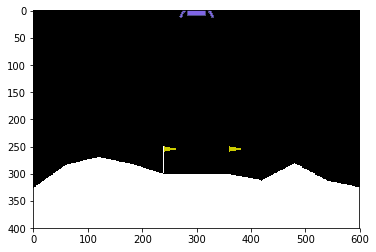

In [0]:
import gym
env = gym.make("LunarLander-v2")

plt.imshow(env.render('rgb_array'))

state_dim=env.observation_space.shape
print("Observation space dim:", state_dim)
n_action= env.action_space.n
print("Action space shape:", n_action)

reset() - reset environment to initial state, return first observation

render() - show current environment state (a more colorful version :) )

step(a) - commit action a and return (new observation, reward, is done, info)


In [0]:
obs0 = env.reset()
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity

initial observation code: [ 0.00283756  1.4184152   0.28738642  0.3331092  -0.00328112 -0.06509735
  0.          0.        ]


In [0]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# Note: as you can see, the car has moved to the riht slightly (around 0.0005)
import tensorflow as tf
import keras
import keras.layers as L
tf.reset_default_graph()
sess=tf.InteractiveSession()
keras.backend.set_session(sess)
saver = tf.train.Saver(max_to_keep=2, keep_checkpoint_every_n_hours=1)

taking action 2 (right)
new observation code: [ 0.00552874  1.4259039   0.2730865   0.33282274 -0.00720752 -0.07853463
  0.          0.        ]
reward: -0.49964835178214456
is game over?: False


Using TensorFlow backend.


In [0]:
agent=keras.models.Sequential()
print((2*state_dim[0],))
Layer1=agent.add(L.InputLayer((2*state_dim[0],)))
Layer2=agent.add(L.Dense(100,activation='relu'))
Layer3=agent.add(L.Dense(100,activation='relu'))
Layer4=agent.add(L.Dense(n_action ,activation='softmax'))

agent2=keras.models.Sequential()
Layer12=agent2.add(L.InputLayer((2*state_dim[0],)))
Layer22=agent2.add(L.Dense(100,activation='relu'))
Layer32=agent2.add(L.Dense(100,activation='relu'))
Layer42=agent2.add(L.Dense(n_action ,activation='softmax'))

W0827 14:25:09.914318 140587525711744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 14:25:09.916687 140587525711744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 14:25:09.930177 140587525711744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



(16,)


In [0]:
def get_action(s, epsilon):
  q_values=agent.predict(s[None])[0]
  q_values2=agent2.predict(s[None])[0]
  
  expl=np.random.random()
  if expl<epsilon:
    action= np.random.choice(n_action,1)[0]
  else:
    action=np.argmax(q_values + q_values2)
  return action
    

In [0]:
#create placeholder for training
state_ph= tf.placeholder('float32', shape=(None,)+ (2*state_dim[0],))
action_ph= tf.placeholder('int32', shape=[None])
reward_ph= tf.placeholder('float32', shape=[None])
next_st_q= tf.placeholder('float32', shape=[None])
next_st_q2= tf.placeholder('float32', shape=[None])
next_state_ph= tf.placeholder('float32', shape=(None,)+ (2*state_dim[0],))
is_done_ph= tf.placeholder('bool', shape=[None])

In [0]:
pred_q= agent(state_ph)
pred_q2= agent2(state_ph)

pred_qvalues1 = tf.reduce_sum(pred_q*tf.one_hot(action_ph, n_action), axis=1)
pred_qvalues2 = tf.reduce_sum(pred_q2*tf.one_hot(action_ph, n_action), axis=1)

In [0]:
gamma=0.7
#q_values for next state
#next_st_q= agent(next_state_ph)
#next_st_q2= agent2(next_state_ph)
target_q= reward_ph  + gamma*next_st_q#(tf.argmax(next_st_q2))
target_q2= reward_ph + gamma*next_st_q2#(tf.argmax(next_st_q2))

target_q = tf.where(is_done, reward_ph, target_q)
target_q2 = tf.where(is_done, reward_ph, target_q2)

W0827 14:25:10.092608 140587525711744 deprecation.py:323] From <ipython-input-16-f13582f075ce>:8: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
loss1= (tf.stop_gradient(target_q)- pred_qvalues1)**2
loss1= tf.reduce_mean(loss1)
loss2= (tf.stop_gradient(target_q2)- pred_qvalues2)**2
loss2= tf.reduce_mean(loss2)

train_step1= tf.train.AdamOptimizer(1e-4).minimize(loss1)
train_step2= tf.train.AdamOptimizer(1e-4).minimize(loss2)

# Time to play(Try fastai also)

Try tweaking t or action strategy

**Remember**: Target is to reach to flag

In [0]:
def generate_session(t_max=500, epsilon=0, train=True):
  import time
  total_reward=0
  s = env.reset()
  see = 0
  pre_st= [0, 0, 0, 0, 0, 0, 0, 0]
  exp = []
  pre = np.empty((1,16))
  new = np.empty((1,16))

  for t in range(t_max):
    pre = np.concatenate((pre_st,s))
    a=get_action(pre, epsilon)
    
    next_s,r,is_done,_ = env.step(a)
    new = np.concatenate((s, next_s))
    q1= agent.predict(new[None])[0]
    q2= agent2.predict(new[None])[0]
    qa1= q1[np.argmax(q2)]
    qa2= q2[np.argmax(q1)]
    exp.append(([pre], [a], [r], [qa1], [qa2], [new]))
    if t >=100:
      exp.pop(0)
    
    if train:
      idx= [int(np.random.randint(0,len(exp), size=1)) for _ in range(round(len(exp)/4))]
      for i in idx:
        prob=np.random.random()
        if prob<0.8:
          sess.run(train_step1, {state_ph: exp[i][0], action_ph: exp[i][1], reward_ph: exp[i][2],next_st_q:exp[i][3],
                               next_st_q2:exp[i][4], next_state_ph: exp[i][5], is_done_ph: [is_done]})
        else:
          sess.run(train_step2, {state_ph: exp[i][0], action_ph: exp[i][1], reward_ph: exp[i][2],next_st_q:exp[i][3],
                               next_st_q2:exp[i][4], next_state_ph: exp[i][5], is_done_ph: [is_done]})

    total_reward+=r
    pre_st=s
    s=next_s
    if t%10==0:
      '''fig=plt.imshow(env.render('rgb_array'))
      plt.show(fig)
      time.sleep(0.01)
      plt.close('all')'''
    if is_done:  
      see+=1
      break
      
  return total_reward

In [0]:
epsilon=0.5

In [0]:
#from google.colab import files
#files.upload()

In [0]:
import os
checkpoint_directory = "/train_ckpt"
checkpoint_prefix = os.path.join(checkpoint_directory, "ckpt")
#checkpoint1 = tf.train.Checkpoint(optimizer=AdamOptimizer(), model=agent)
#checkpoint2 = tf.train.Checkpoint(optimizer=AdamOptimizer(), model=agent2)
#agent = checkpoint1.restore(tf.train.latest_checkpoint(checkpoint_directory))


In [0]:

for i in range(900):
  session_rewards= [generate_session(epsilon=epsilon, train=True) for _ in range(10)]
  print("epoch #{}\tmean reward = {:.3f}\tepsilon = {:.3f}".format(i, np.mean(session_rewards),
                                                                   epsilon))
  
  #if i%100==0:
    
  #plt.imshow(env.render('rgb_array'))
  epsilon*=0.99
  assert epsilon >= 1e-4, "Make sure epsilon is always nonzero during training"
    
  if np.mean(session_rewards) < -100 and epsilon < 0.01:
      epsilon = 0.3
    
  if np.mean(session_rewards) > 10:
      print ("You Win!")
      break

W0827 14:25:10.560888 140587525711744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0827 14:25:10.565462 140587525711744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



epoch #0	mean reward = -160.497	epsilon = 0.500
epoch #1	mean reward = -112.251	epsilon = 0.495
epoch #2	mean reward = -107.006	epsilon = 0.490
epoch #3	mean reward = -92.332	epsilon = 0.485
epoch #4	mean reward = -153.139	epsilon = 0.480
epoch #5	mean reward = -144.048	epsilon = 0.475
epoch #6	mean reward = -183.708	epsilon = 0.471
epoch #7	mean reward = -117.410	epsilon = 0.466
epoch #8	mean reward = -97.610	epsilon = 0.461
epoch #9	mean reward = -157.431	epsilon = 0.457
epoch #10	mean reward = -157.725	epsilon = 0.452
epoch #11	mean reward = -104.724	epsilon = 0.448
epoch #12	mean reward = -165.584	epsilon = 0.443
epoch #13	mean reward = -91.212	epsilon = 0.439
epoch #14	mean reward = -201.187	epsilon = 0.434
epoch #15	mean reward = -65.806	epsilon = 0.430
epoch #16	mean reward = -242.337	epsilon = 0.426
epoch #17	mean reward = -146.046	epsilon = 0.421
epoch #18	mean reward = -81.212	epsilon = 0.417
epoch #19	mean reward = -132.893	epsilon = 0.413
epoch #20	mean reward = -89.627	eps

In [0]:
import glob, io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

In [0]:
import gym.wrappers
env = gym.wrappers.Monitor(gym.make("LunarLander-v2"),directory="videos",force=True)
sessions = [generate_session(epsilon=0, train=False) for _ in range(100)]
env.close()

def show_video():
  mp4list = glob.glob('videos/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

show_video()

In [0]:
from google.colab import files
mp4list = glob.glob('videos/*.mp4')
mp4 = str(mp4list[0])
files.download(mp4)